#  eGold, is Bitcoin a store of value?

## Introduction

For our Ironhack's third project we had to chose a topic for the analysis and we chose the Bitcoin, because it's been a topic of hot deabate over the last years and we were curious about the insights that we could find with the tools we have avaliable from the course. Then we decided to connect it a bit with the present situation thorwing in the mix a little bit of data from the Covid-19 crises that's taking over our lifes nowadays.

The questions that we asked ourselfs where these:
1. Is Bitcoins volatility much higher than the USD/EUR exchange?
2. How has the Covid-19 affected the BTC/EUR vs the USD/EUR exchange?
3. Is Bitcoin a new store of value?



## Methods of acquiring the data

As we needed to use at least two methods to get the data, we first tried to gather it using an API (since we just learned how to work with them). But we encountered the problem that the API's about cryptocurrency are mostly pay-to-have. They only let you have the daily data and we needed the historical data to be able to get some conclusions.
Then we decided we were going to use the methods of webscrapping and importing a a few csvs to gather our data.


### Methods :

- Web scraping from CoinMarketcap's website. [[1]](https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130429&end=20200420)
- Importing a csv file from YahooFinance to have the historical data of the EUR/USD exchange.[[2]](https://finance.yahoo.com/)
- Importing two csv files about the new confirmed cases and the daily deaths caused by Covid-19.[[3]](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)

## Data Wrangling and cleaning

In [1]:
from IPython.display import Image

Here are two data cleaning methods that we want to highlight:

1. Replace the comma separators from the webs numbers with empty strings to make the numbers readable by python.

2. Built a column that recreates the USD/EUR exchange from the EUR/USD by doing the invers of the first exchange.

### Without further delay, here are thestatistics and plots that led us to answer the said questions.

## 1. Bitcoin volatility vs EUR/USD Exchange volatility

From the describe of the merged dataframe we saw that since Bitcoin launched its standard deviation has been huge. In comparison with the Standard Deviation for the USD/EUR Exchange we saw the BTC/EUR's volatility is 3836.616782763622 times higher for the same time period.
But let us show you in a graph.

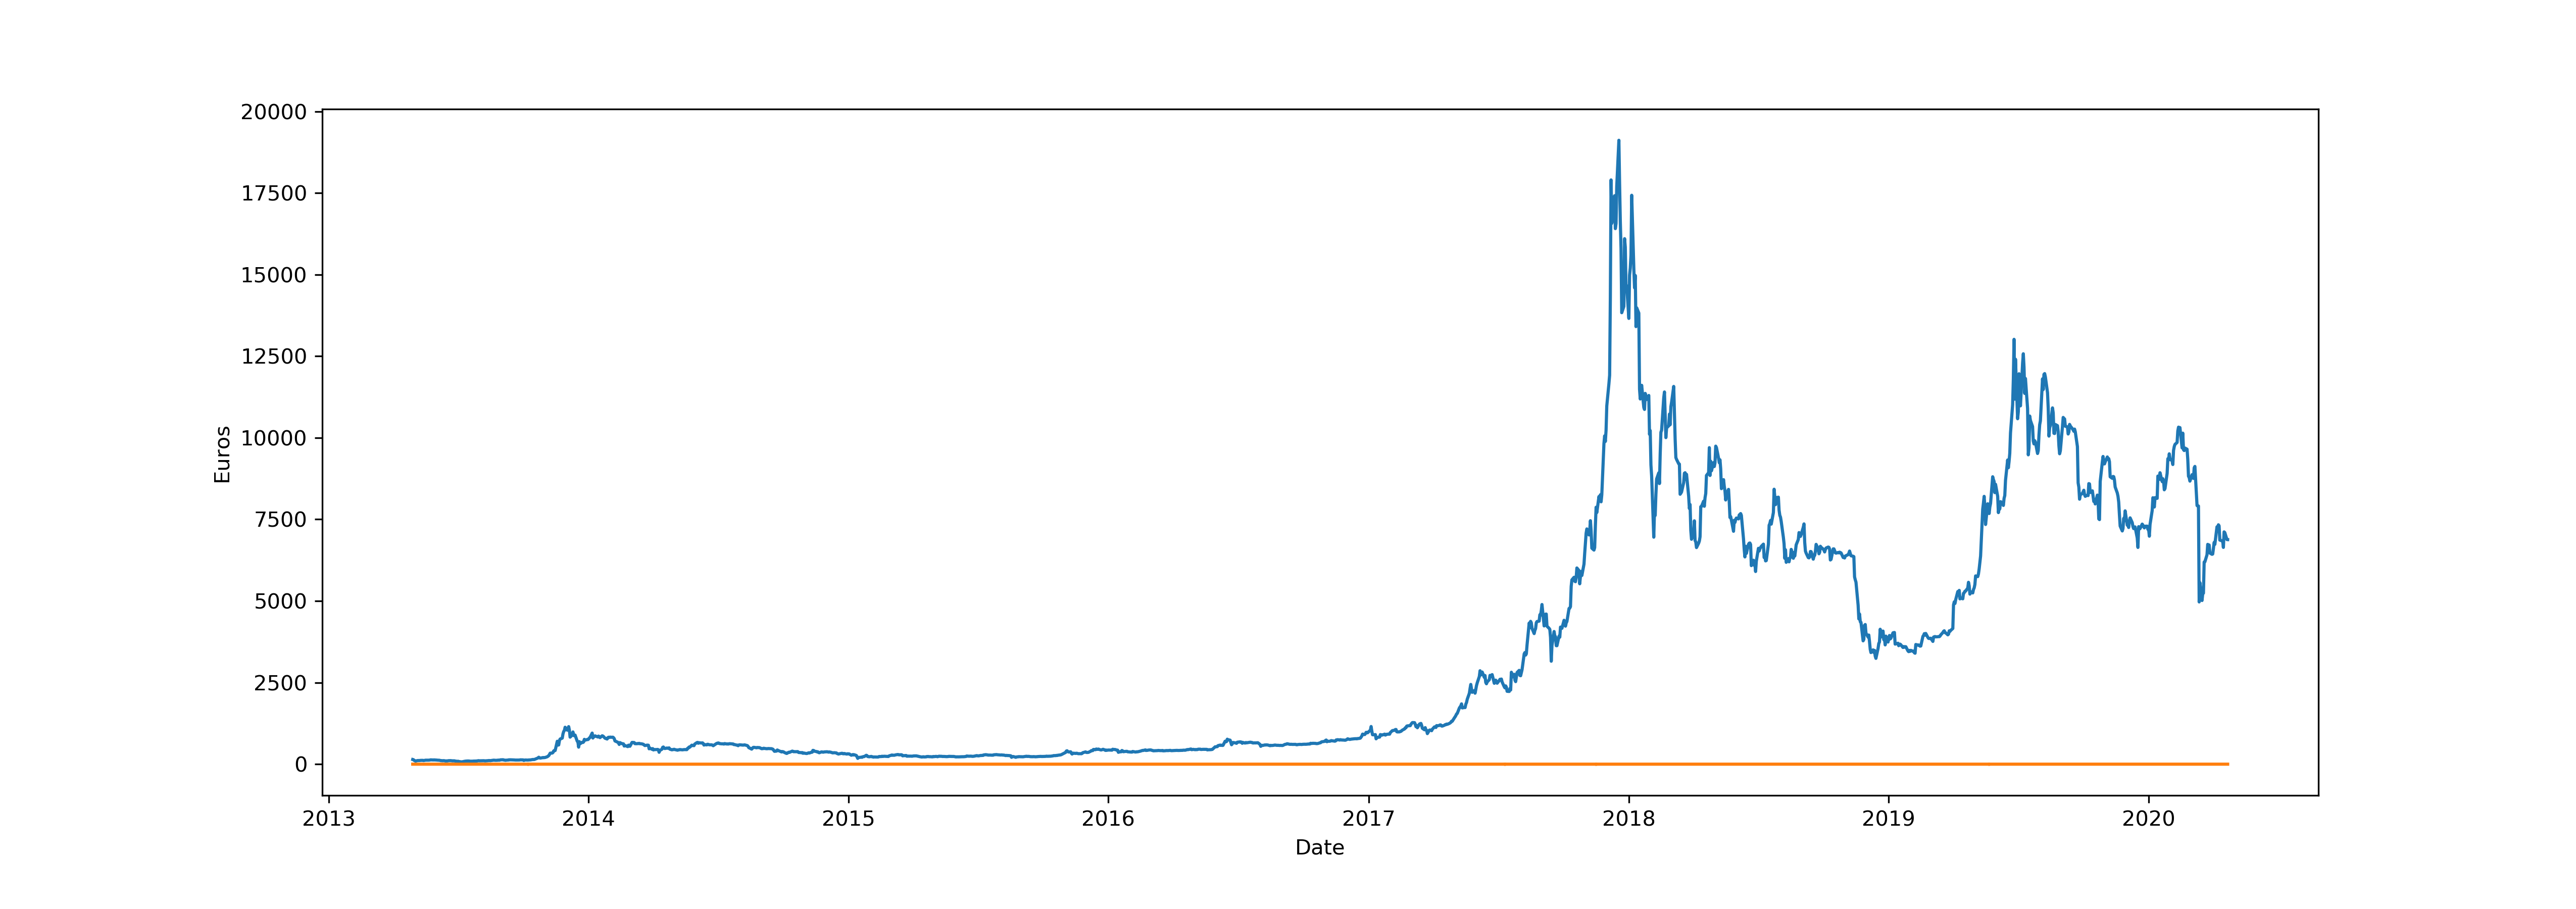

In [2]:
Image("volatility_historic.png")

Historically the USD/EUR price has been stable and we can see it keeps its behaviour as a store of value. While, as we thought, the price of the BTC is much higher than the USD/EUR as we can see in this graph.
But let's se what happens with the data from the last 365 days.

From the data about from April 2019 to April 2020 we could see that the difference in the standard deviations has reduced. With this data we can conclude that Bitcoin prices are indeed quite unstable, especially if we compare them with the price surges and lows from a fiat currency exchange, that for EUR/USD makes more than 60% of the transactions of FX market. 
[[1]](https://en.wikipedia.org/wiki/Foreign_exchange_market)

### Price Histograms

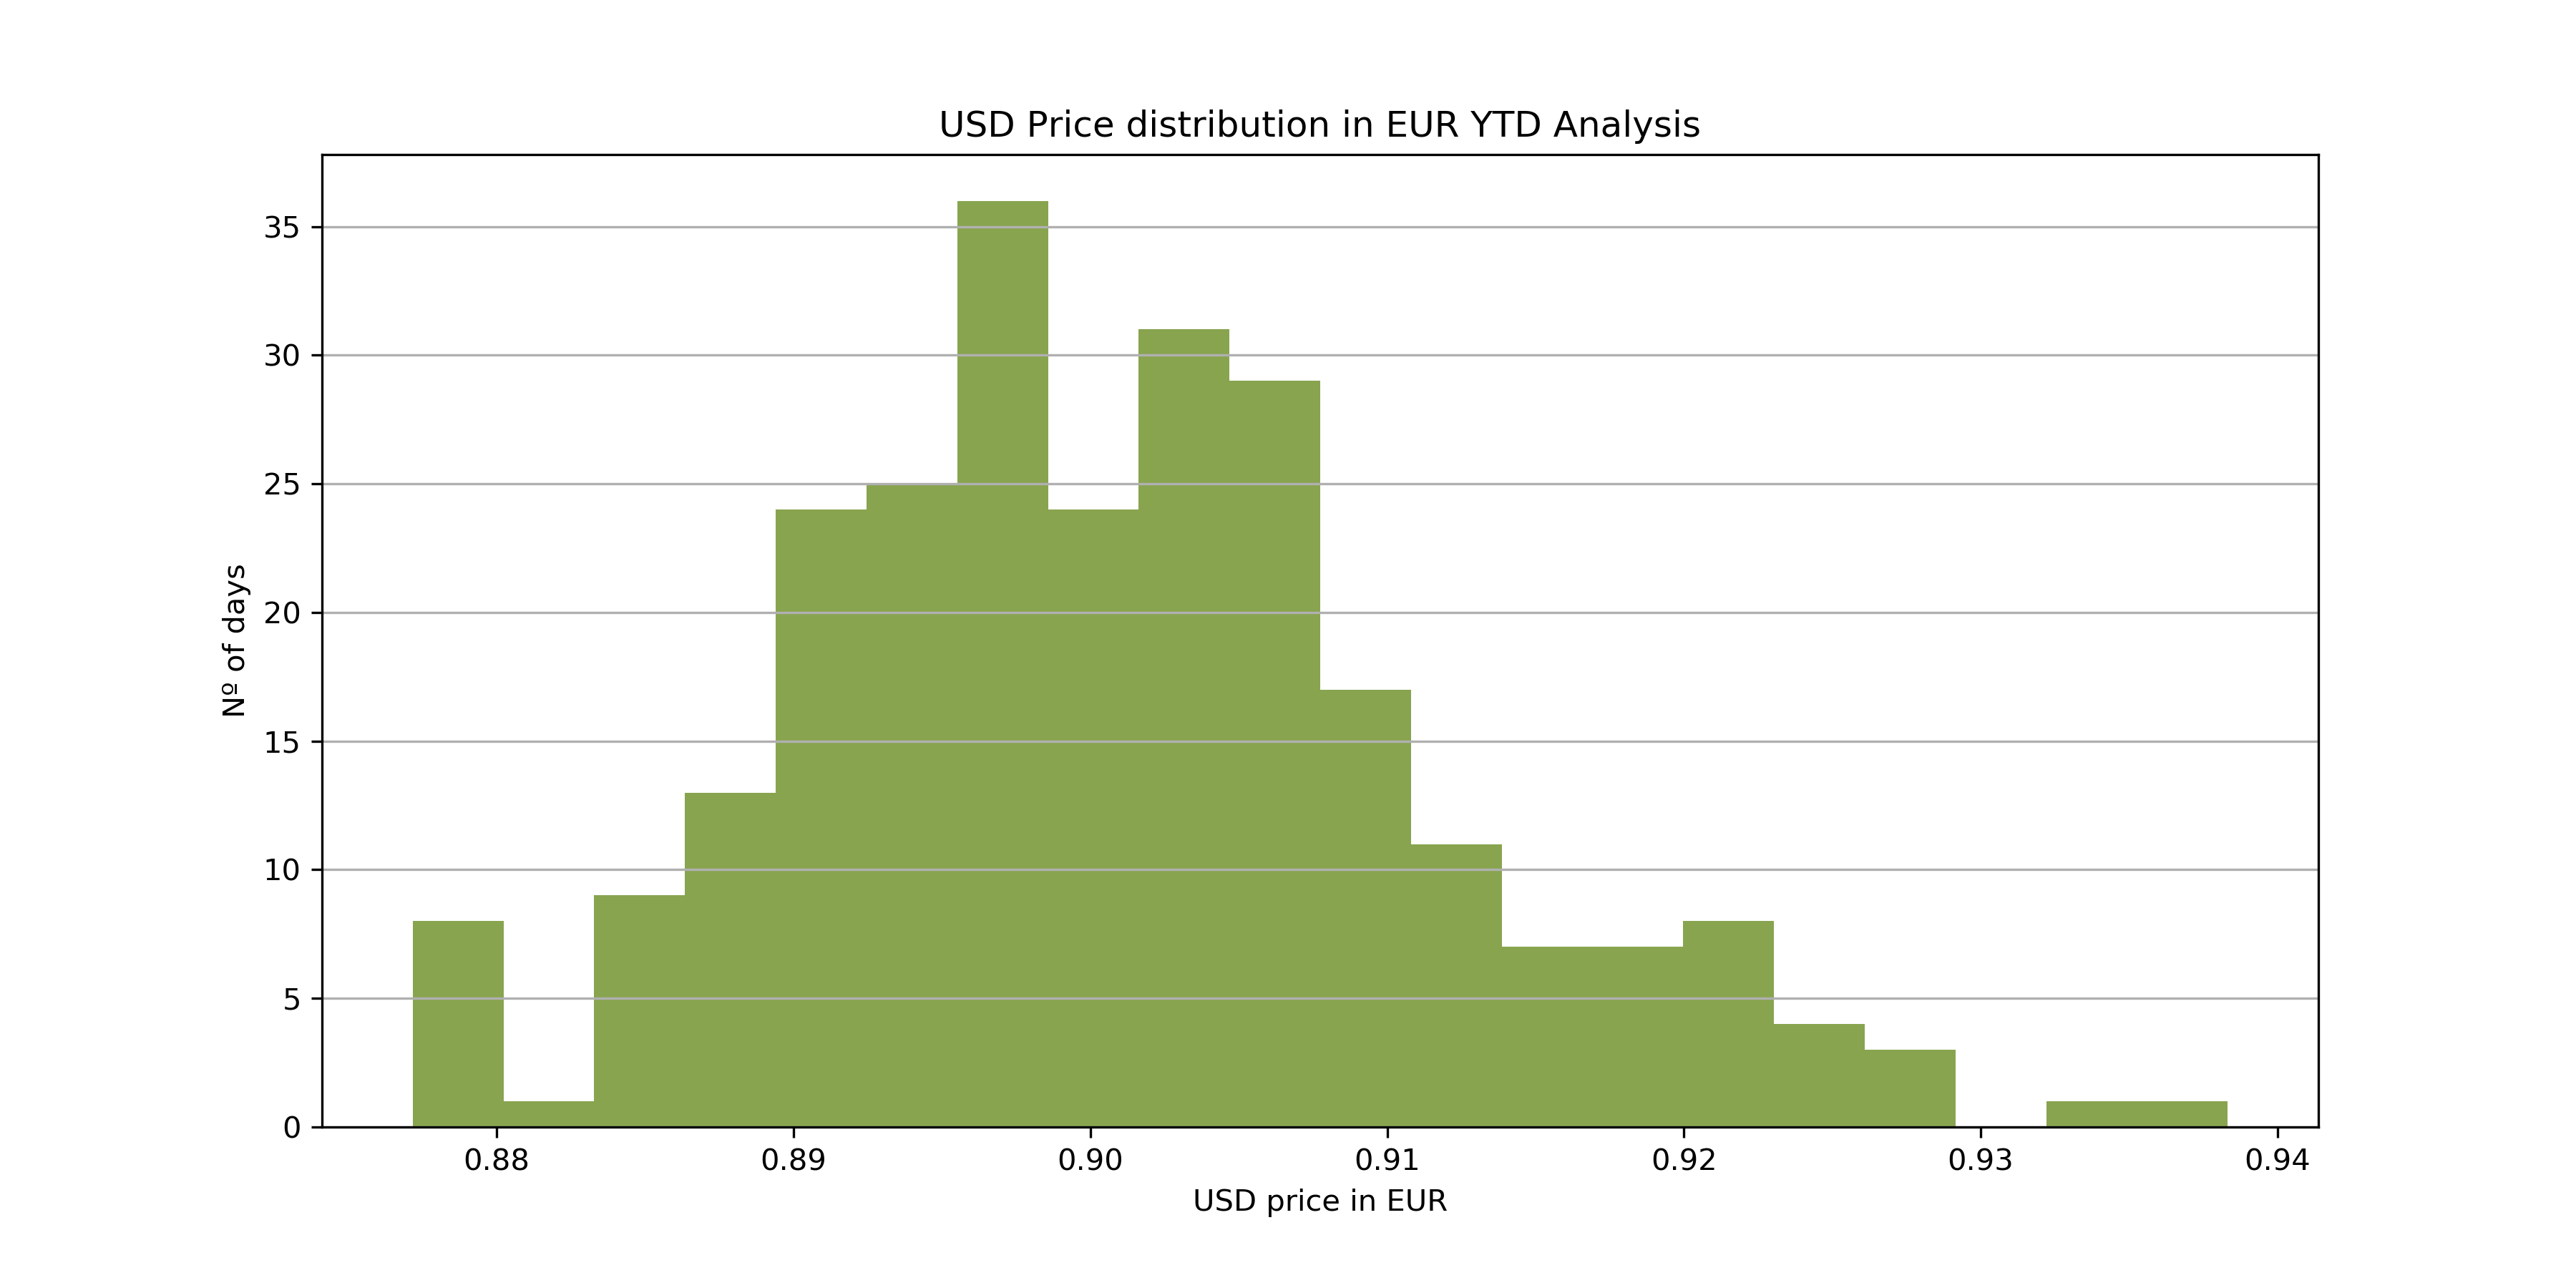

In [3]:
Image("volatility_YTD_USD_EUR.png")

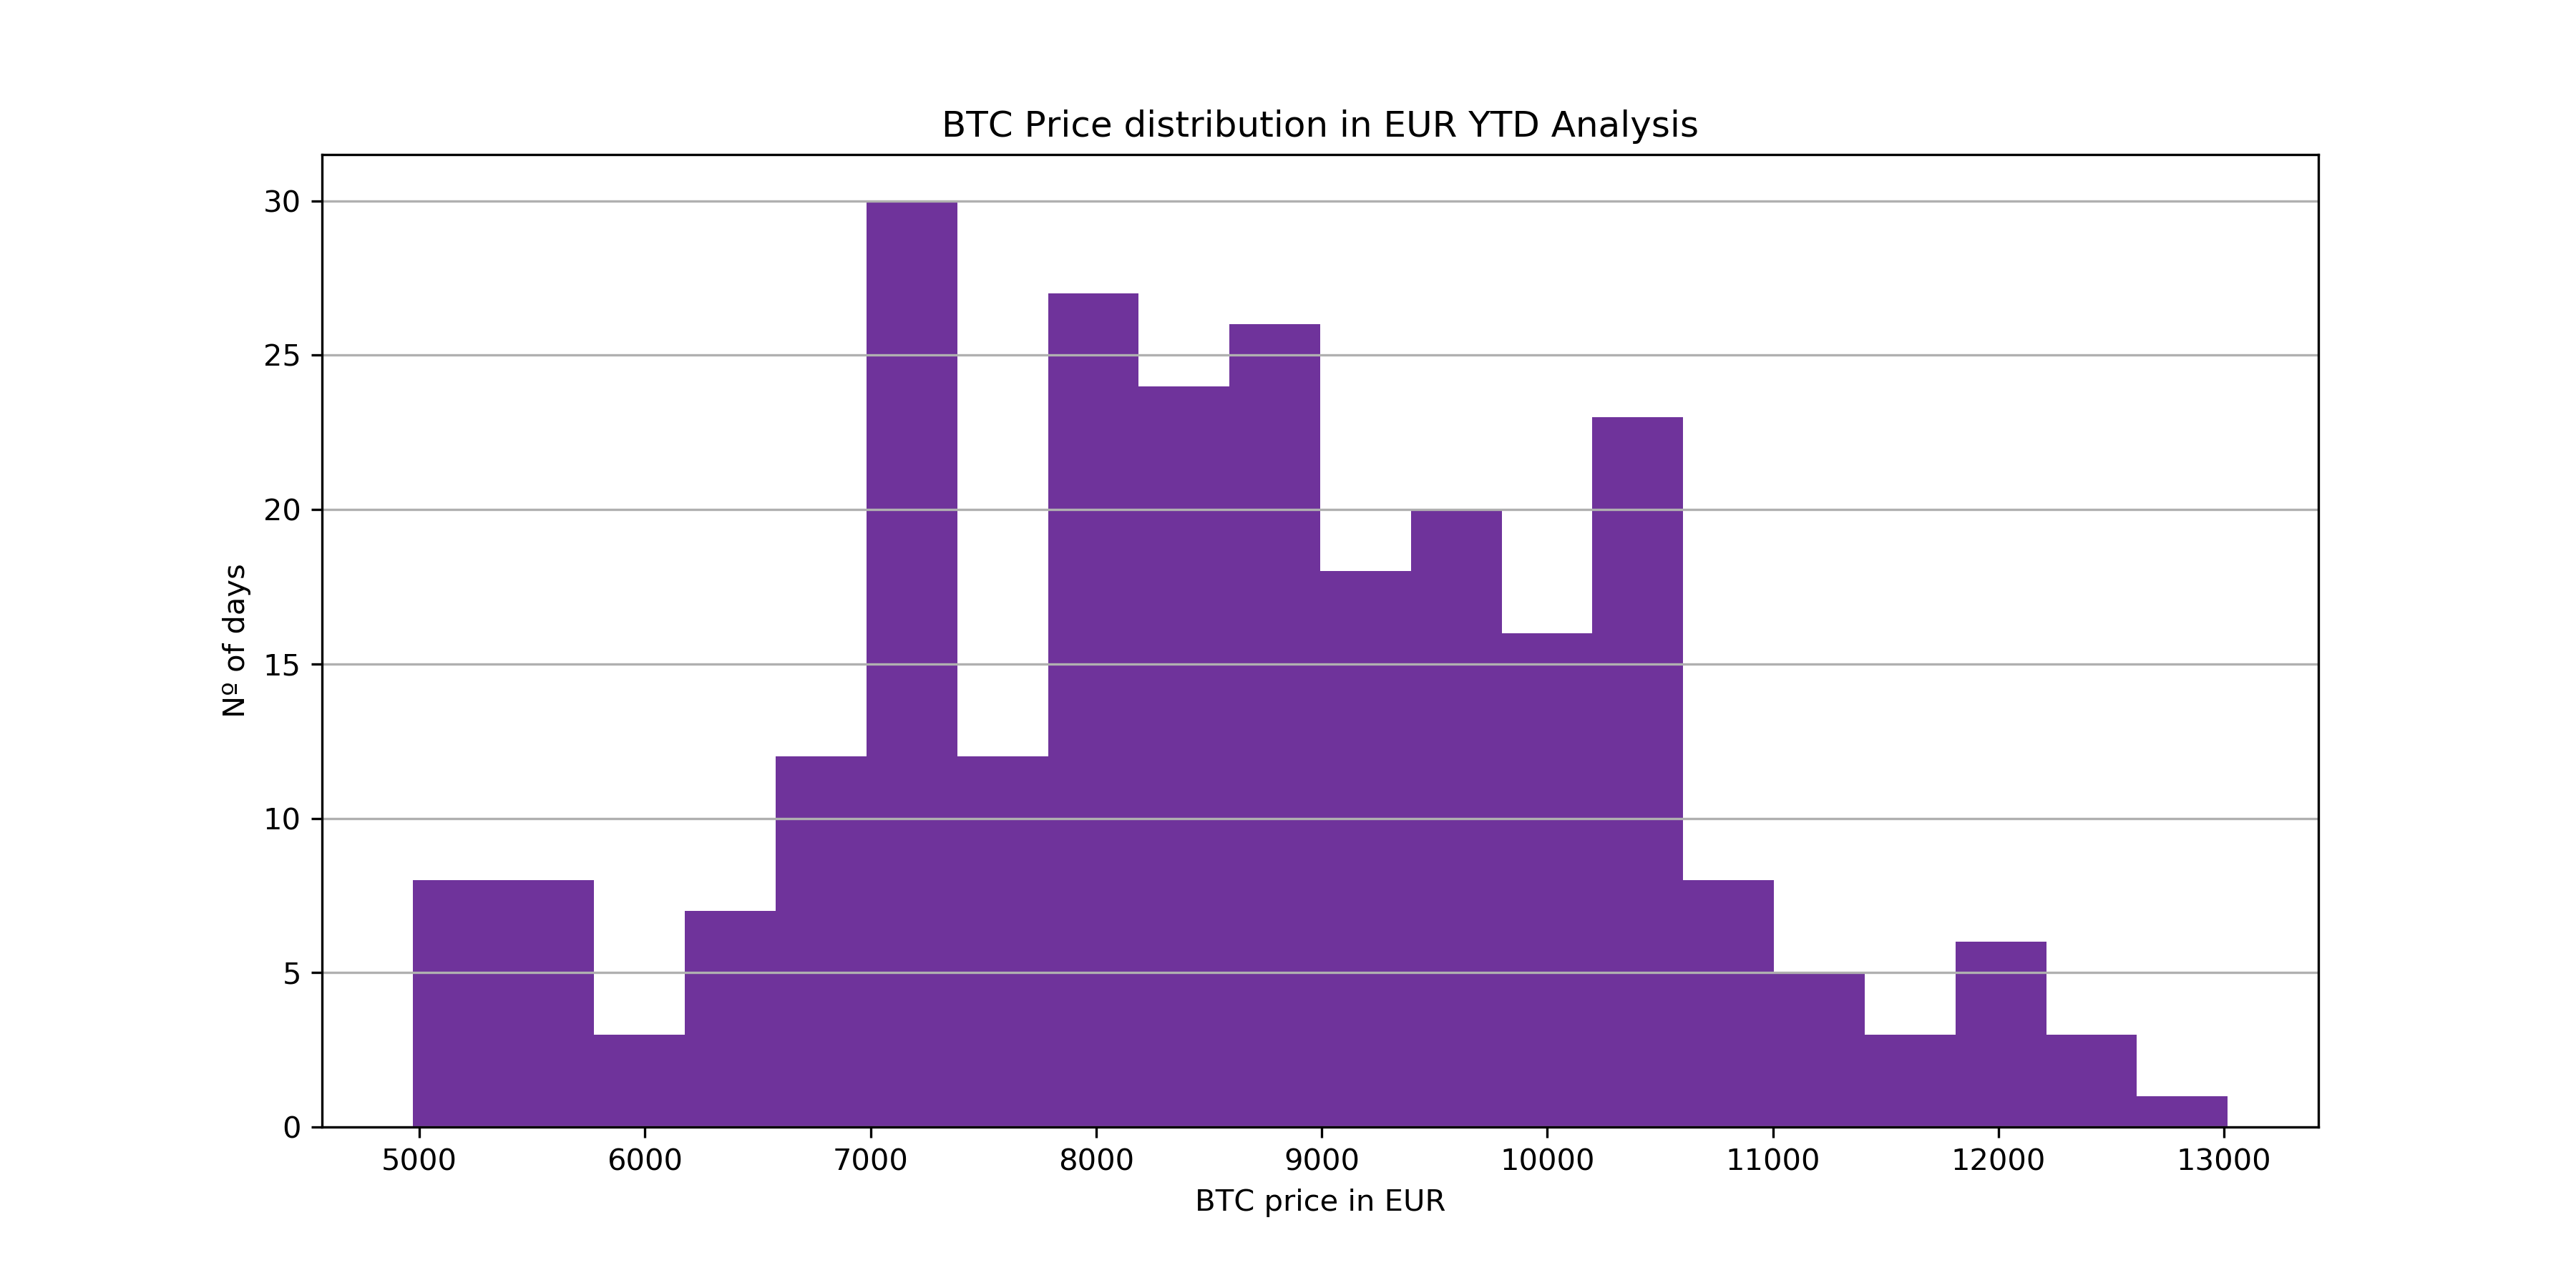

In [4]:
Image("volatility_YTD_BTC_EUR.png")

From the graphs above we can see that the behavior of the BTC/EUR and the EUR/USD exchanges are pretty similar (in relative terms because the absolute variation is still much higher with Bitcoin) and this can tell us that the value for bitcoin is stabilizing and it's starting to look normally distributed like the EUR/USD. Therefore, we can start seeing why some people would use it as a store of value (not for a European citizen yet, but if your country's currency has a higher volatility it could be a good option to go for).

## 2. How has the Covid-19 affected the BTC/EUR vs the USD/EUR exchange?

To answer this question we needed to merge the dataframe we had with a dataframe with the new daily confirmed cases and deaths of Covid-19. Once we had done that we started to get conclusions about this virus' impact to those two exchanges.

To be able to compare the data que ended up with two main columns for the Covid-19 data, one for the USA and another for the countries in the Eurozone. 

#### After building the correlation matrix and plotting the results we saw we had certain data messing up the output.
#### Then we decided to analyse the data only when the Covid-19 cases were higher than 25.000 in the Eurozone and the results changed, answering our question.

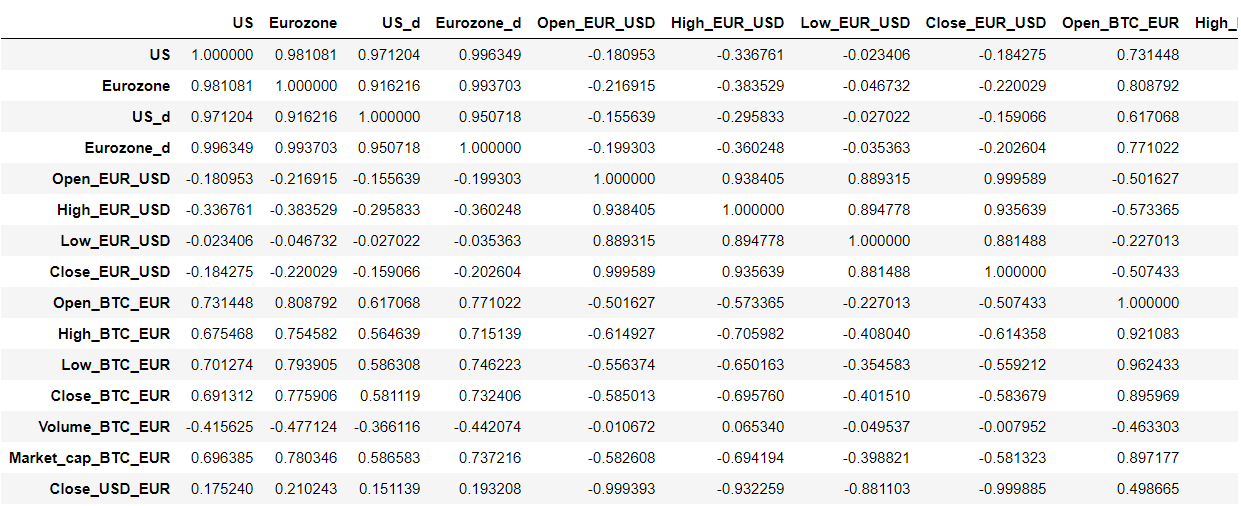

In [5]:
Image("corr_matrix.png")

From this matrix we can already see that the correlation between the Covid-19 cases and the close price of the BTC/EUR (0,78) is stronger than between the Covid-19 cases and the close price of the USD/EUR exchange (0,21), but let's see if the plots confirm ours conclusions. 

## Scatterplots for correlation between COVID-19 Contagions and BTC/EUR exchange and USD/EUR exchange

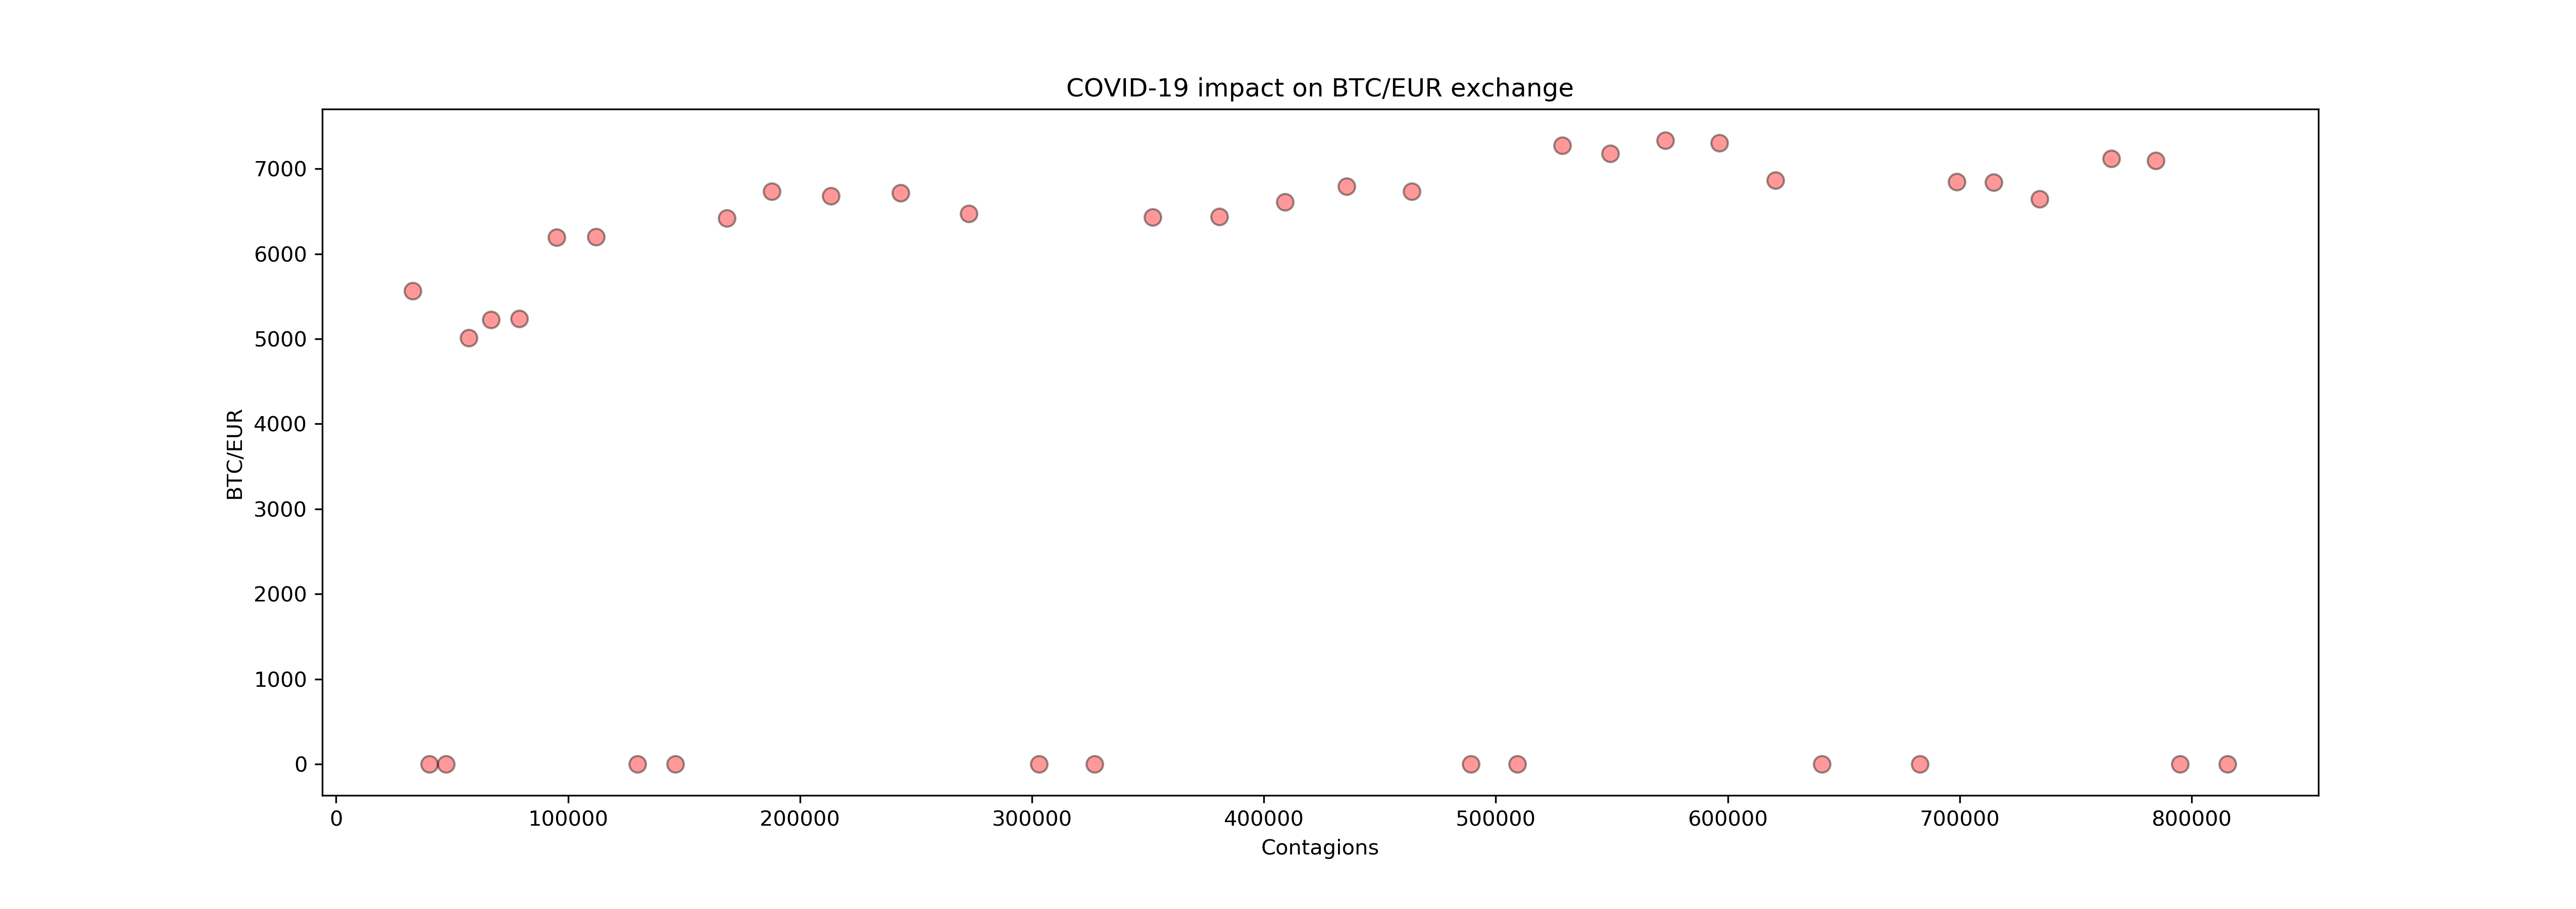

In [6]:
Image("covid_BTC.png")

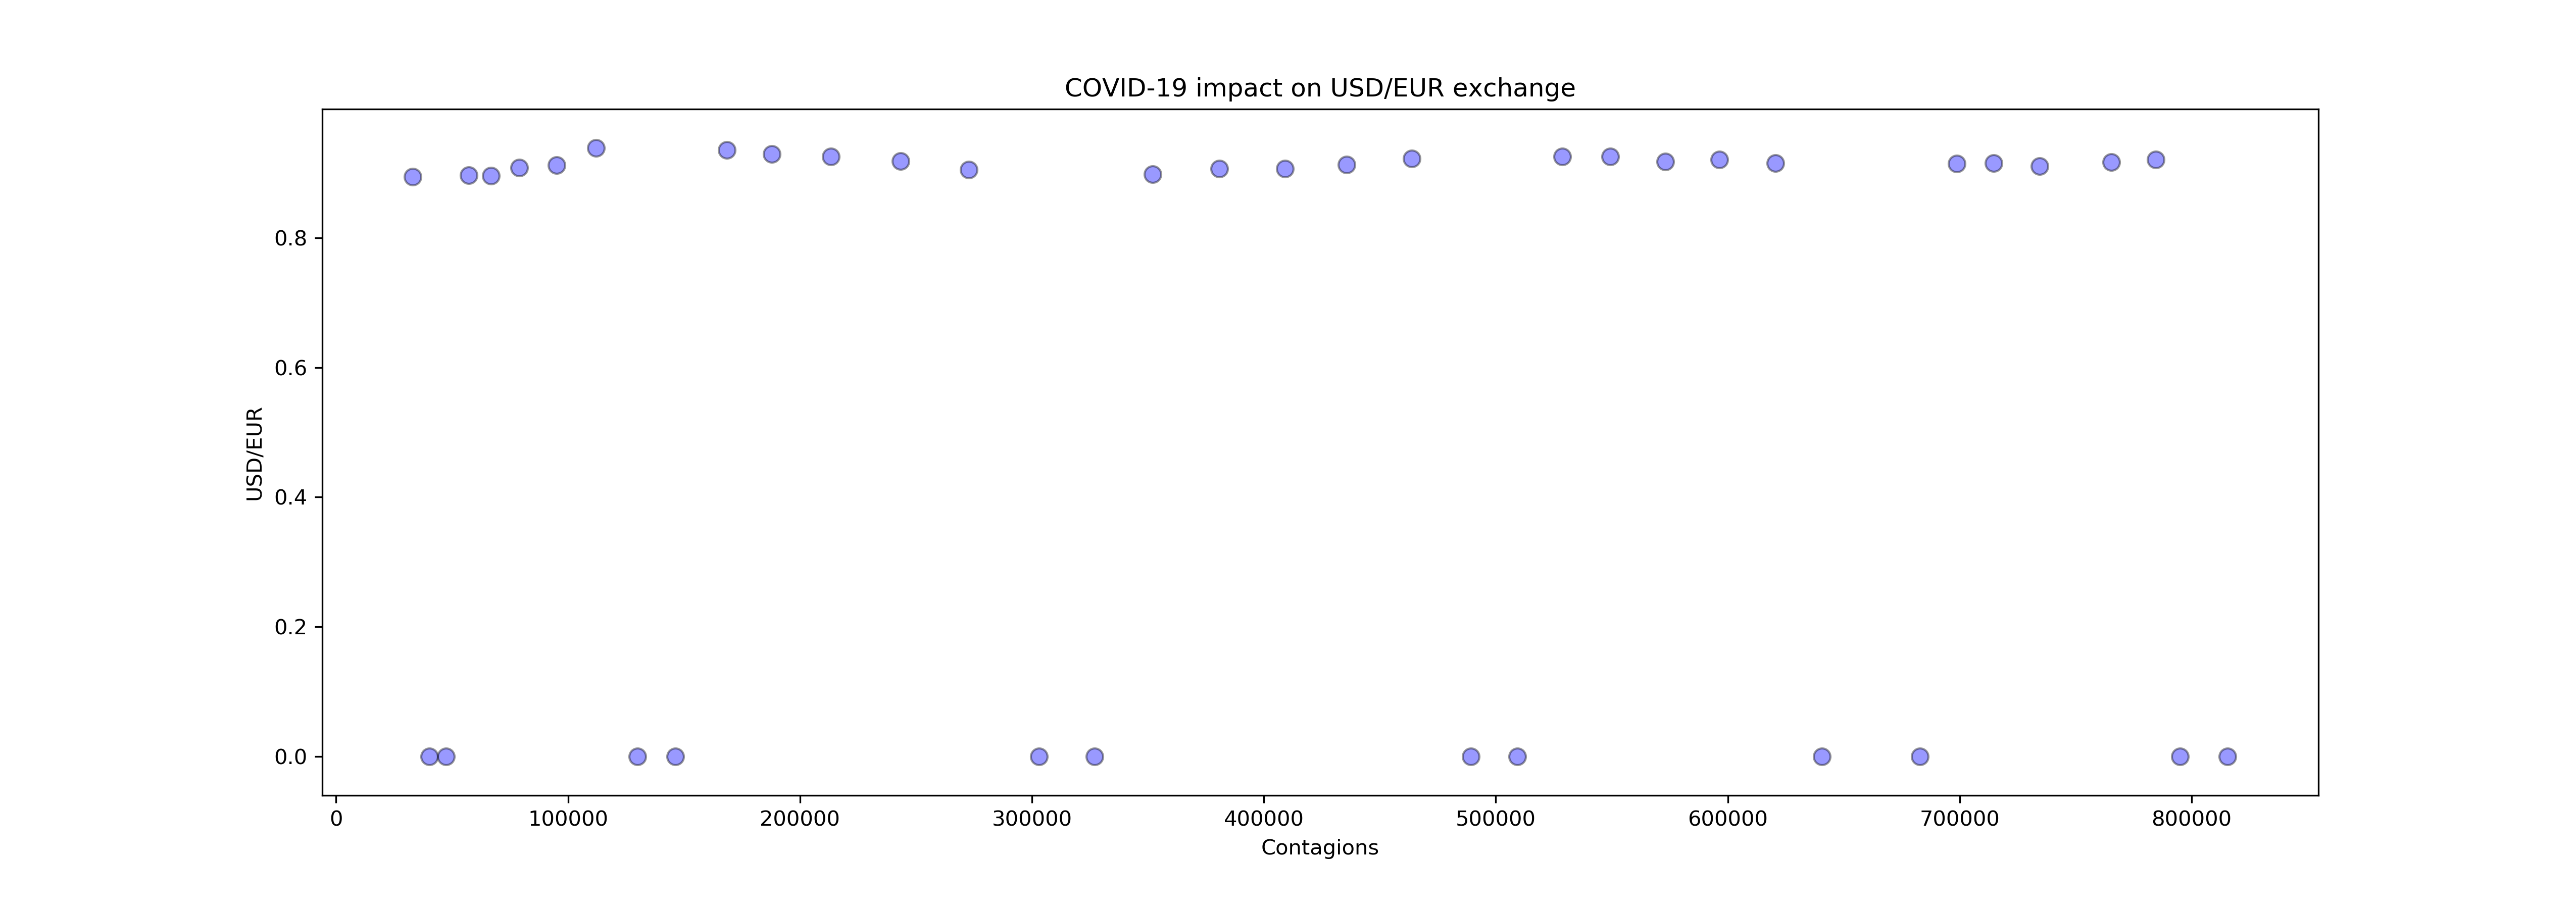

In [7]:
Image("covid_EUR.png")

From the plots above we can see much more clearly that the strengh of the correlation between covid-19 cases and the Bitcoin price is quite stronger than the one with the USD/EUR.

We can see that the price of the Bitcoin in EUR increses more than the USD/EUR exchange when the number of cases increase.

This could explain why in times like this there are people that are betting on the Bitcoin to be a better store of value than the EURO. It's clear that the fiat currencies are much more affected by external shocks such as this Covid-19 crisis that make the foundation of a country tremble.

To sum up, we have seen that the Bitcoin price is more afected by the Covid-19 than the USD/EUR, but it's a positive relationship, so the more Covid-19
cases there are in Europe the higher gets the price of the Bitcoin and the less Euros you get for each Dollar.
Therefore, the impact is higher to the Bitcoin, but in positive terms, making it a good option as a store of value.

To show you more clearly the conclusions above, we have calculated the regression line for those two variables and they look like this:

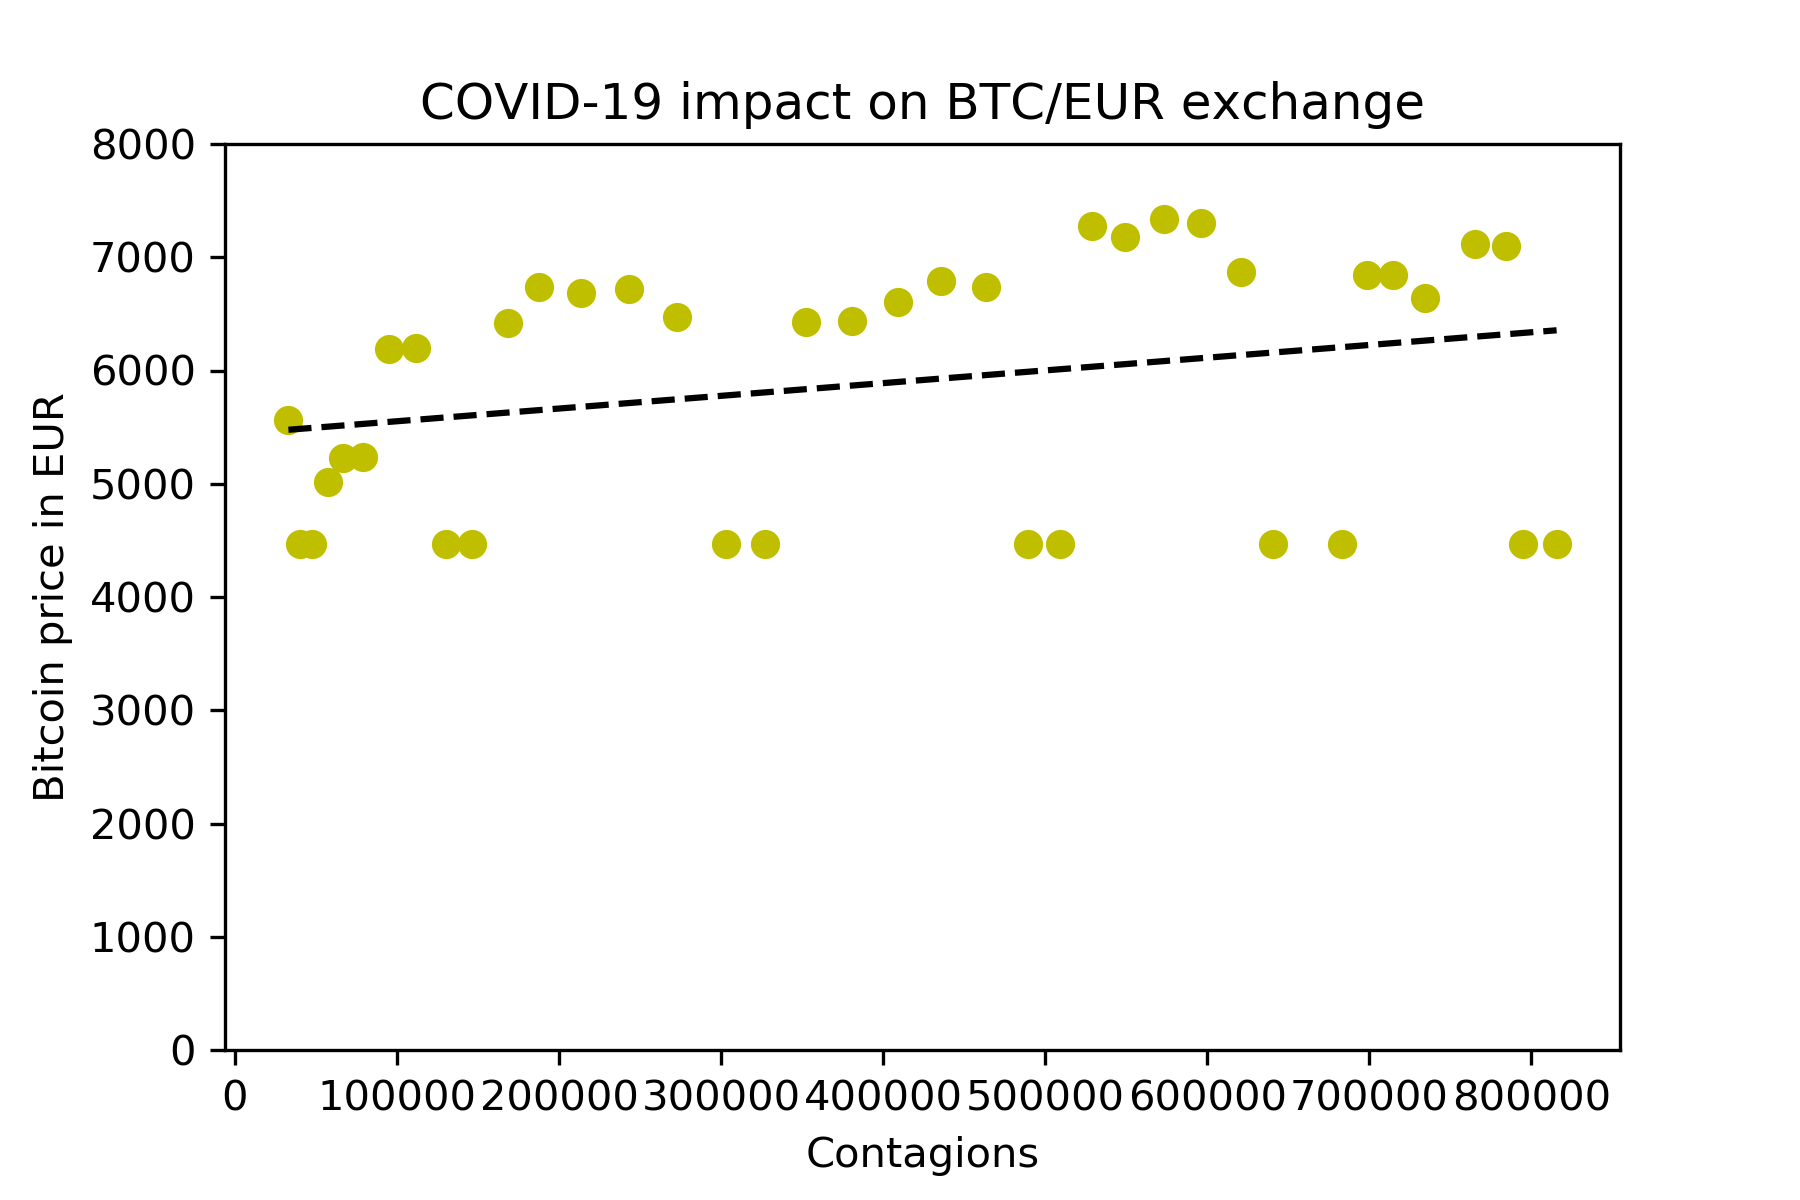

In [12]:
Image("reg_BTC.png")

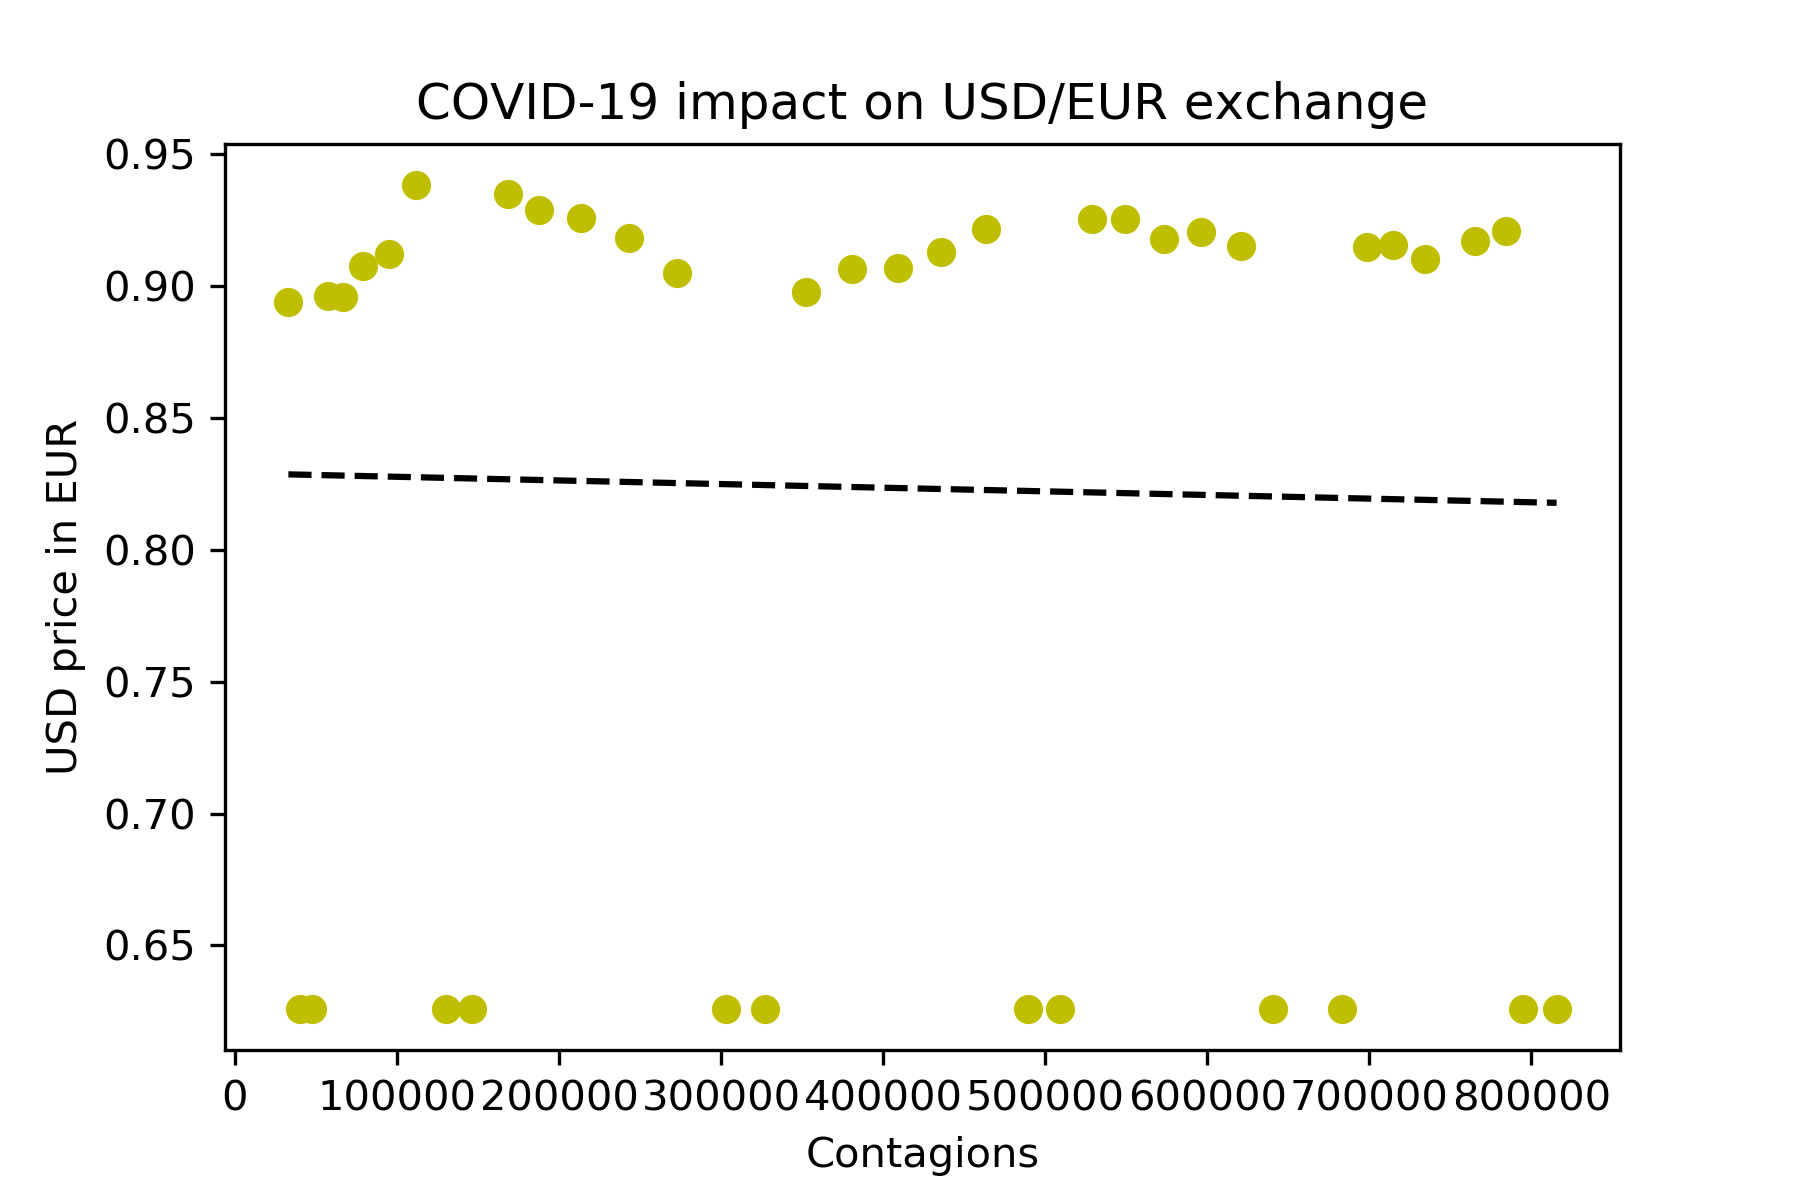

In [15]:
Image("reg_EUR.png")

From the linear regression lines from above we can now clearly see that the Covid-19 crisis has made the Bitcoin price to increase, making it a good moment to invest in it. 

## 3. Is Bitcoin a new store of value?

### There's two characteristics a store of value has to have:
- Supply is finite: The offer of it can’t be artificially boosted.
- Retaining value: A store of value is an asset that’s capable of retaining value over time.

####  The bitcoin agrees completely with the first condition as the number of bitcoins is a finit one.

#### But the second condition is harder to satisfy, because it depends on two things:
1. The currency of your savings

If your currency is volatile in itself (like the Venezuelan Bolivar),         bitcoin can be a good store of value because it has more stability and       it's more worth that your fiat currency over time.
But if your currency is a stable one (I.E. USD or EUR) bitcoin wouldn't       be a good store of value in normal circumstances because of its higher       volatility.

2. The economic circumstances of the specific moment.

As we said above, if your currency is a strong one and the circumstances are normal, Bitcoin wouldn't be a good store of value.
Although...What if the economy has taken an external shock?
Then the value of its currency will be much more afected by the shock. Making the bitcoin a more stable currency. Therefore th Bitcoin becomes a better store of value.
Nevertheless, we also think that if the shock is big enough to bring us to a post-apocalyptic scenario, we assume Bitcoin's value would drop to 0 very fast, so the risk is there.

  

### So, is it a Store of Value?
#### It depends on the moment and the situation

Now we can conclude supported by the the correlations and the plots that the Covid-19 crisis has impacted much more to the Bitcoin price than to the
USD/EUR exchange. In other words, the more cases a the Eurozone has, the higher the Bitcoin price gets. 

### Therefore, we can conclude that nowadays it makes sense to use Bitcoin as a _STORE OF VALUE_.